In [171]:
import pandas as pd

url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/tellecom.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [174]:
# TotalChagres 칼럼에서 숫자형태의 문자가 아닌 값 -> 결측치로 처리
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [175]:
df['TotalCharges'].isna().sum()

np.int64(11)

<Axes: >

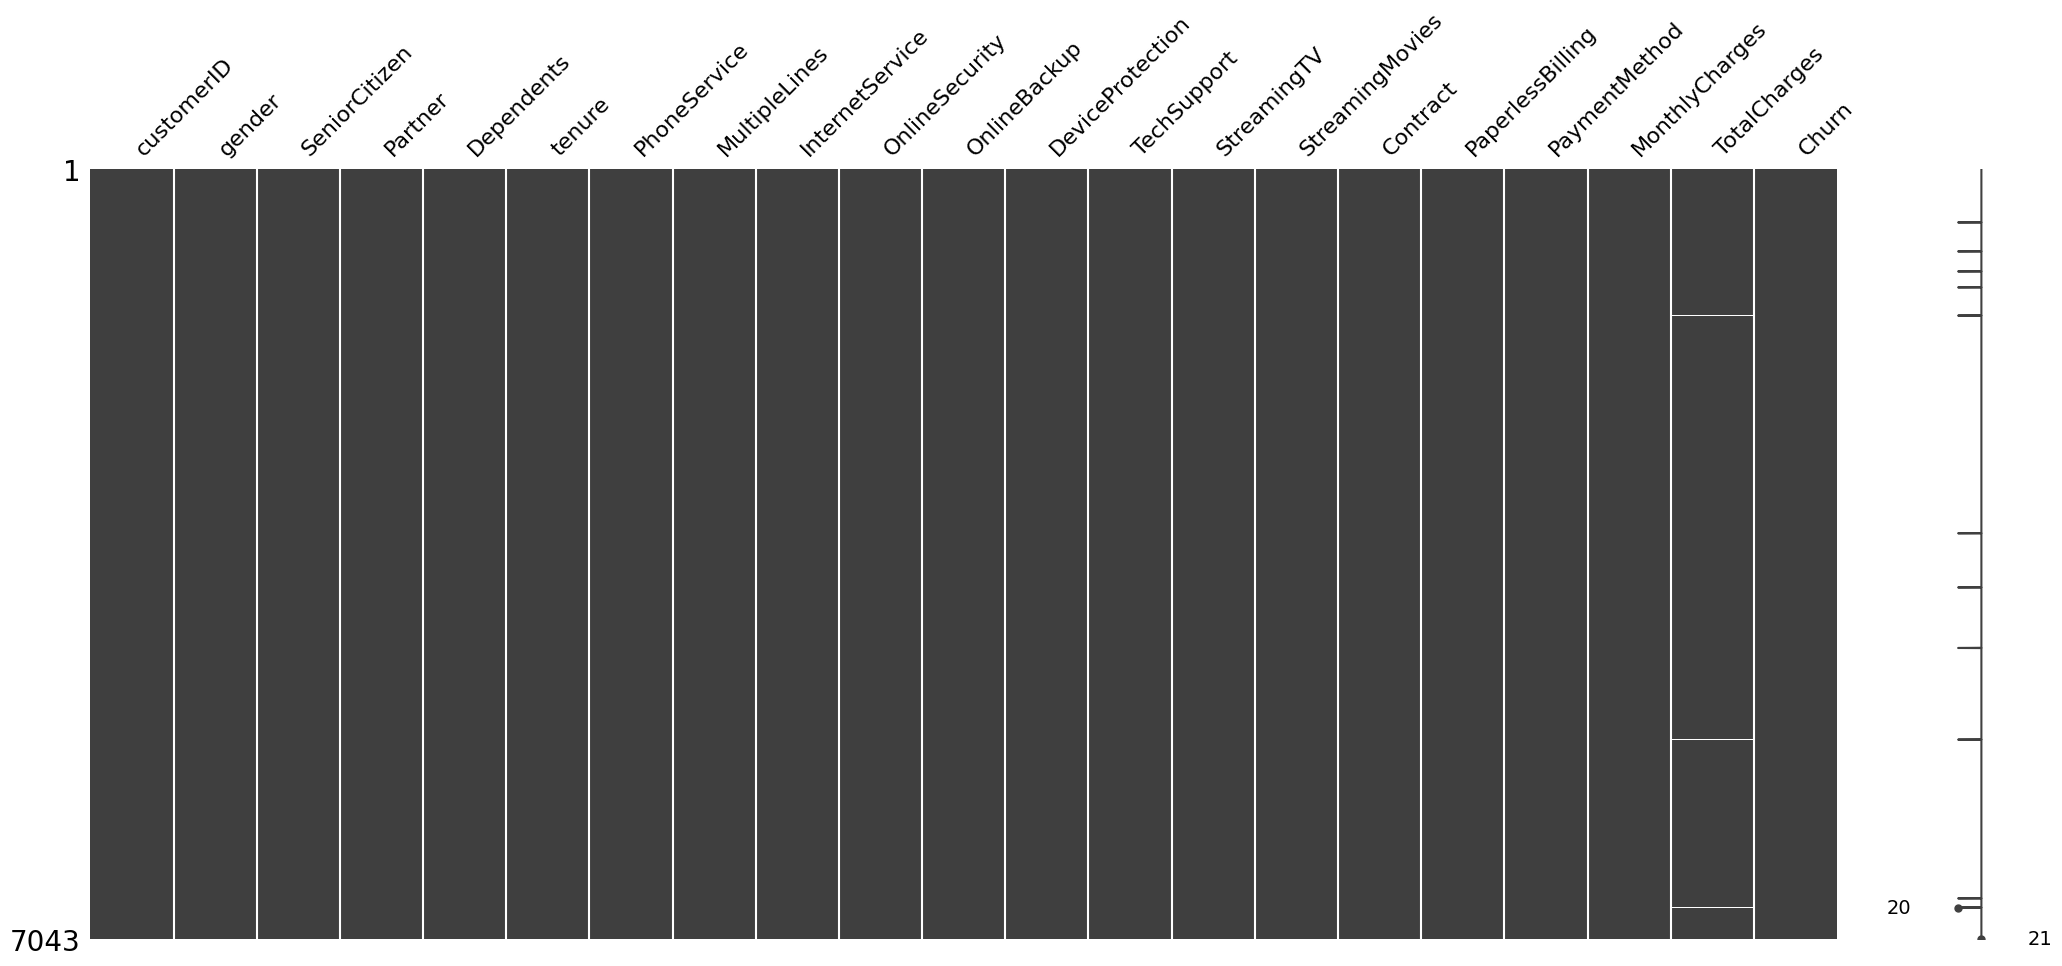

In [176]:
# 결측치 시각화
import missingno as msno
msno.matrix(df)

In [177]:
df.isna().mean() # 결측치 비율 0.001562 --> 해당 row 삭제

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [178]:
df = df.dropna(subset=['TotalCharges'])

In [179]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


In [180]:
# 이탈 여부 Churn --> Yes or No를 1 or 0으로 변경 => 분석이 용이함(ex: T/F, 여/남)
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Churn'].head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_59204\3322445866.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

<function matplotlib.pyplot.pie(x: 'ArrayLike', *, explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'>

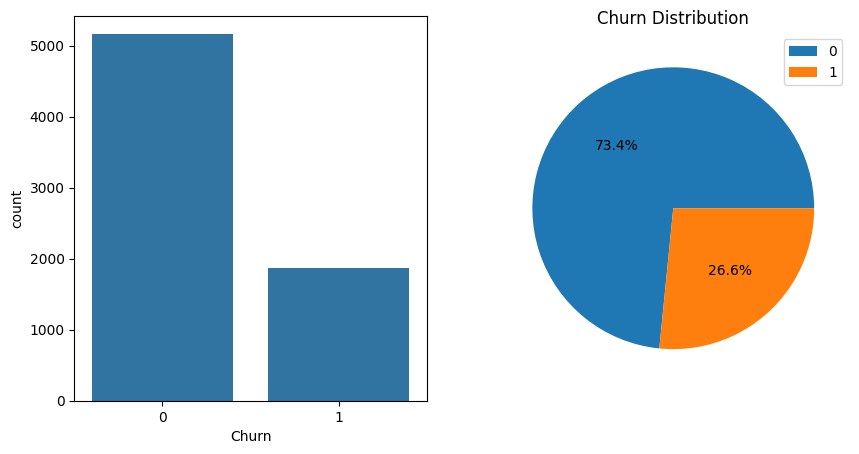

In [181]:
# 이탈 고객의 현황 시각화
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(1,2, figsize=(10,5))

sns.countplot(data=df, x='Churn', ax=ax[0])

df['Churn'].value_counts()
ax[1].pie(x=df['Churn'].value_counts(), autopct= '%1.1f%%')
ax[1].set_title("Churn Distribution")
ax[1].legend(['0','1'])
plt.pie
# 이탈률


In [182]:
# 타깃이 되는 변수와 같이 영향을 미치는 다른 변수와의 관계
df.head()
# 비용에 따른 가입 유지여부 확인
# TotalCharges 연속형 변수 -> 범주형 변수
# 3등분 (L,M,H) 새로운 칼럼에 추가
# 새로운 칼럼별 가입 여부에 대한 groupby => 시각화
labels = ['L','M','H']
df['TotalCharges_Rank'] = pd.qcut(df['TotalCharges'], q=3, labels=labels)

In [183]:
df.tail()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Rank
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,M
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,H
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,L
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,L
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,0,H


<Axes: xlabel='TotalCharges_Rank', ylabel='count'>

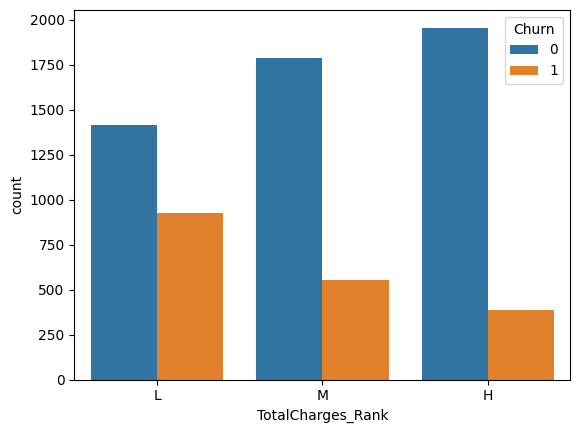

In [184]:
sns.countplot(data=df, x='TotalCharges_Rank',hue='Churn')

In [185]:
# 계약 종류(Contract)에 따른 고객 분포
# 가입 기간(tenure) 분포
# 계약 종류에 따른 이탈률
# 가입 기간에 따른 이탈률
# 월 요금에 따른 이탈률
# 상관관계 분석 (Correlation Analysis)

<Axes: xlabel='Contract', ylabel='Churn'>

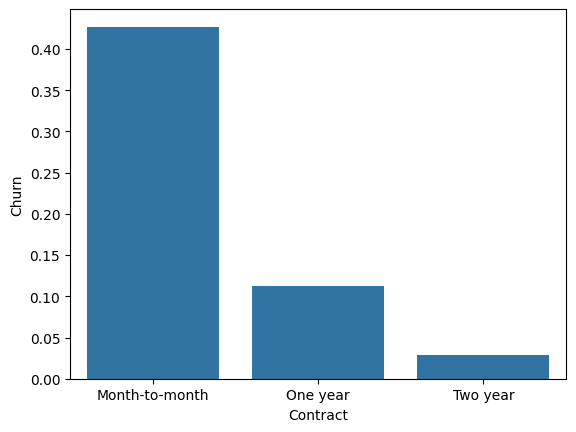

In [186]:
# Contract에 따른 단순 이탈률
df['Contract'].value_counts()

contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()
sns.barplot(data=contract_churn, x='Contract', y='Churn')


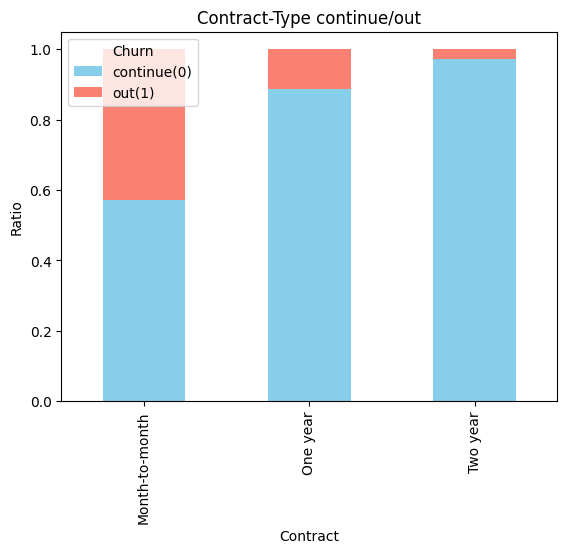

In [187]:
# 고객 분포까지 고려한 Contract별 이탈률
import matplotlib.pyplot as plt
import pandas as pd

contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True, color=['skyblue','salmon'])

plt.ylabel("Ratio")
plt.title("Contract-Type continue/out")
plt.legend(title="Churn", labels=["continue(0)", "out(1)"])
plt.show()

<Axes: xlabel='tenure', ylabel='Churn'>

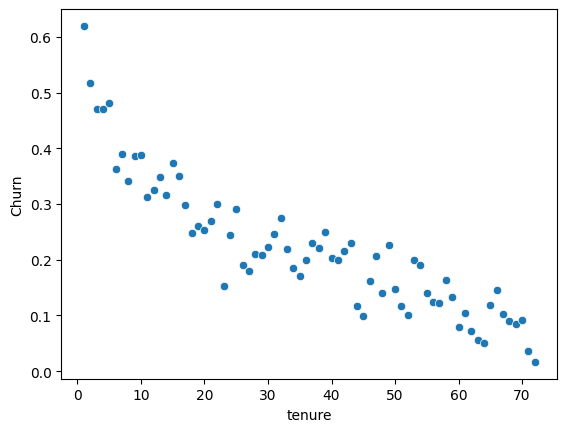

In [188]:
# 가입 기간(tenure) 분포
df['tenure'].value_counts()

tenure_churn = df.groupby('tenure')['Churn'].mean().reset_index()
sns.scatterplot(data=tenure_churn, x='tenure', y='Churn')

<Axes: xlabel='tenure', ylabel='Churn'>

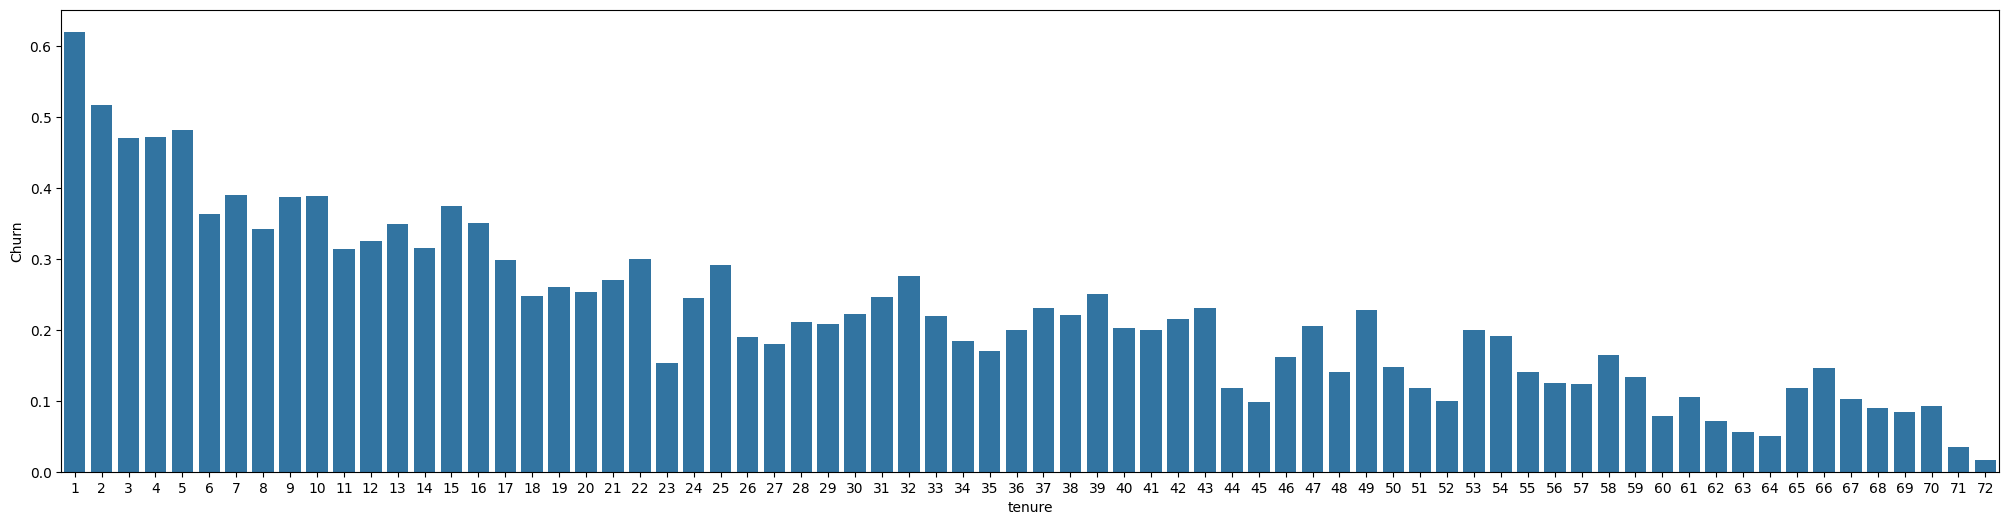

In [189]:
# 가입 기간에 따른 이탈률
# "tenure 구간별 이탈률"을 보려면 파이 차트보다는 **막대 그래프(bar plot)**가 적합함
plt.figure(figsize=(25,6))

sns.barplot(data=tenure_churn, x='tenure', y='Churn')

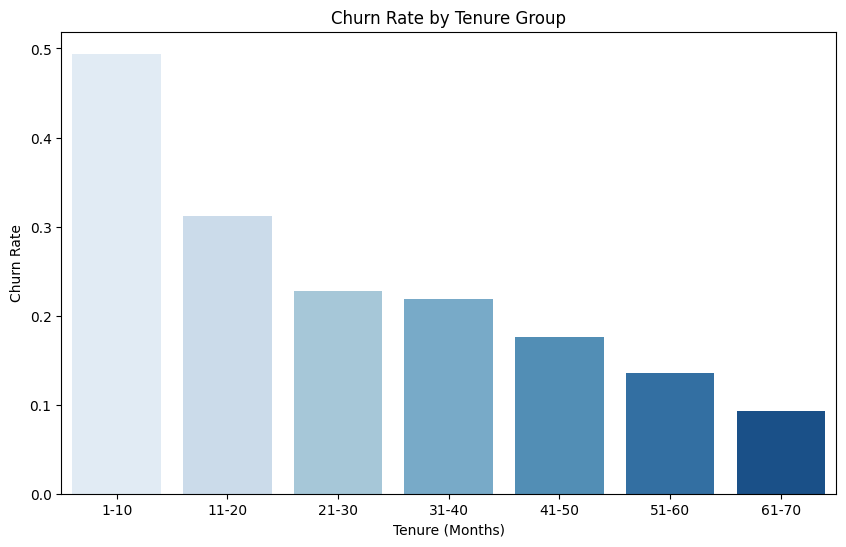

In [190]:
# 구간 경계 정의 (1~70, step=10)
bins = [0,10,20,30,40,50,60,70]
labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70']

# tenure 구간 변수 생성
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# 구간별 이탈률 계산
tenure_churn_grouped = df.groupby('tenure_group', observed=False)['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(10,6))

sns.barplot(
    data=tenure_churn_grouped,
    x='tenure_group',
    y='Churn',
    hue='tenure_group',
    palette="Blues",
    legend=False
)

plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure (Months)")
plt.show()


In [191]:
# 상관관계
df.info()

# df를 문자열이 아닌 <<숫자형 데이터>>로만 구성해 .corr()적용

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   object  
 1   gender             7032 non-null   object  
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   object  
 4   Dependents         7032 non-null   object  
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   object  
 7   MultipleLines      7032 non-null   object  
 8   InternetService    7032 non-null   object  
 9   OnlineSecurity     7032 non-null   object  
 10  OnlineBackup       7032 non-null   object  
 11  DeviceProtection   7032 non-null   object  
 12  TechSupport        7032 non-null   object  
 13  StreamingTV        7032 non-null   object  
 14  StreamingMovies    7032 non-null   object  
 15  Contract           7032 non-null   object  
 16  PaperlessBi

In [ ]:
# 기술 통계 요약((count, mean, std, min, 25%, 50%, 75%, max)
# 숫자형 칼럼 대상
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [ ]:
# df.loc[:, ... ] 는 행 전체(:), 특정 열(...) 선택
# 추출된 숫자형 컬럼들 간의 **상관계수(correlation matrix)* 계산
#   -1 ~ 1 사이 값
#   양수 → 정비례 관계
#   음수 → 반비례 관계
#   0 근처 → 상관성 거의 없음
df.loc[:, df.describe().columns].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000
